In [1]:
k =803

In [2]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model


import random

import sys
sys.path.append("..")

import dataset,network,dcgan_model

# Load data

In [3]:
# Preprocessing
scenario= "moons" #sinus, helix
n_instance = 1000
n_features = 2
latent_space =3 #6
BATCH_SIZE = 100 #50
scales = ['-1-1','0-1']
scaled = '-1-1'
epochs = 2000  #10000

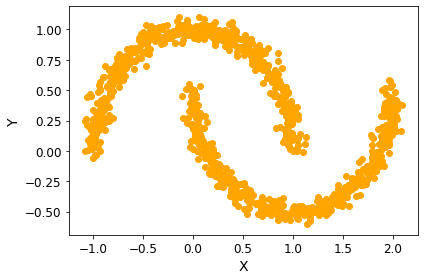

In [4]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [5]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')

print('made dataset')

made dataset


# DC-GAN

### Architecture

In [6]:
generator=network.build_generator(latent_space, n_features)
print('##########generator##########:')
generator.summary()
discriminator=network.build_discriminator(n_features, latent_space, BATCH_SIZE)
print('##########discriminator##########:')
discriminator.summary()
dcgan = dcgan_model.DC_GAN(k, n_features,latent_space,BATCH_SIZE)

##########generator##########:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                96        
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
re_lu (ReLU)                 (None, 16)                0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4)              0         
_________________________________________________________________
conv1d_transpose (Conv1DTran (None, 4, 12)             60        
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 12)             48        
_________________________________________________________________
re_lu_1 (ReLU)           

### Preprocessing

In [7]:
train_dataset, scaler, X_train_scaled = dcgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

for data in train_dataset:
    print('train_dataset',data.shape)

data shape_1 (100, 2)
data shape_2 (100, 2)
data shape_3 (100, 2)
data shape_4 (100, 2)
data shape_5 (100, 2)
data shape_6 (100, 2)
data shape_7 (100, 2)
data shape_8 (100, 2)
data shape_9 (100, 2)
data shape_10 (100, 2)
Cycles:  10
X_train (1000, 1)
y_train (1000, 1)
X_train_scaled (1000, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)


Epoch 1/8000
Epoch 2/8000
Epoch 3/8000
Epoch 4/8000
Epoch 5/8000
Epoch 6/8000
Epoch 7/8000
Epoch 8/8000
Epoch 9/8000
Epoch 10/8000
Epoch 11/8000
Epoch 12/8000
Epoch 13/8000
Epoch 14/8000
Epoch 15/8000
Epoch 16/8000
Epoch 17/8000
Epoch 18/8000
Epoch 19/8000
Epoch 20/8000
Epoch 21/8000
Epoch 22/8000
Epoch 23/8000
Epoch 24/8000
Epoch 25/8000
Epoch 26/8000
Epoch 27/8000
Epoch 28/8000
Epoch 29/8000
Epoch 30/8000
Epoch 31/8000
Epoch 32/8000
Epoch 33/8000
Epoch 34/8000
Epoch 35/8000
Epoch 36/8000
Epoch 37/8000
Epoch 38/8000
Epoch 39/8000
Epoch 40/8000
Epoch 41/8000
Epoch 42/8000
Epoch 43/8000
Epoch 44/8000
Epoch 45/8000
Epoch 46/8000
Epoch 47/8000
Epoch 48/8000
Epoch 49/8000
Epoch 50/8000
Epoch 51/8000
Epoch 52/8000
Epoch 53/8000
Epoch 54/8000
Epoch 55/8000
Epoch 56/8000
Epoch 57/8000
Epoch 58/8000
Epoch 59/8000
Epoch 60/8000
Epoch 61/8000
Epoch 62/8000
Epoch 63/8000
Epoch 64/8000
Epoch 65/8000
Epoch 66/8000
Epoch 67/8000
Epoch 68/8000
Epoch 69/8000
Epoch 70/8000
Epoch 71/8000
Epoch 72/8000
E

Epoch 558/8000
Epoch 559/8000
Epoch 560/8000
Epoch 561/8000
Epoch 562/8000
Epoch 563/8000
Epoch 564/8000
Epoch 565/8000
Epoch 566/8000
Epoch 567/8000
Epoch 568/8000
Epoch 569/8000
Epoch 570/8000
Epoch 571/8000
Epoch 572/8000
Epoch 573/8000
Epoch 574/8000
Epoch 575/8000
Epoch 576/8000
Epoch 577/8000
Epoch 578/8000
Epoch 579/8000
Epoch 580/8000
Epoch 581/8000
Epoch 582/8000
Epoch 583/8000
Epoch 584/8000
Epoch 585/8000
Epoch 586/8000
Epoch 587/8000
Epoch 588/8000
Epoch 589/8000
Epoch 590/8000
Epoch 591/8000
Epoch 592/8000
Epoch 593/8000
Epoch 594/8000
Epoch 595/8000
Epoch 596/8000
Epoch 597/8000
Epoch 598/8000
Epoch 599/8000
Epoch 600/8000
Epoch 601/8000
Epoch 602/8000
Epoch 603/8000
Epoch 604/8000
Epoch 605/8000
Epoch 606/8000
Epoch 607/8000
Epoch 608/8000
Epoch 609/8000
Epoch 610/8000
Epoch 611/8000
Epoch 612/8000
Epoch 613/8000
Epoch 614/8000
Epoch 615/8000
Epoch 616/8000
Epoch 617/8000
Epoch 618/8000
Epoch 619/8000
Epoch 620/8000
Epoch 621/8000
Epoch 622/8000
Epoch 623/8000
Epoch 624/

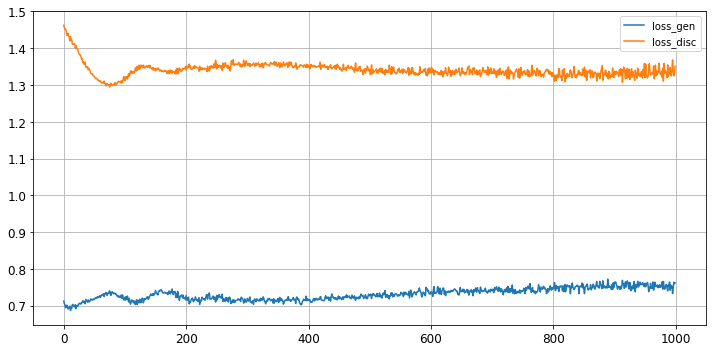

Predicted Values: (1000, 2)
save latent space


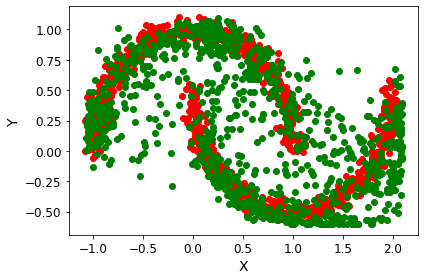

save countour line


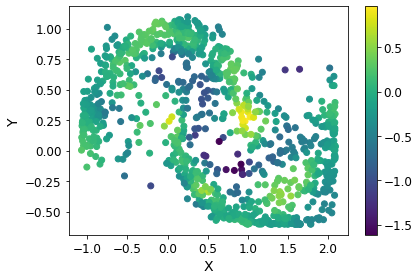

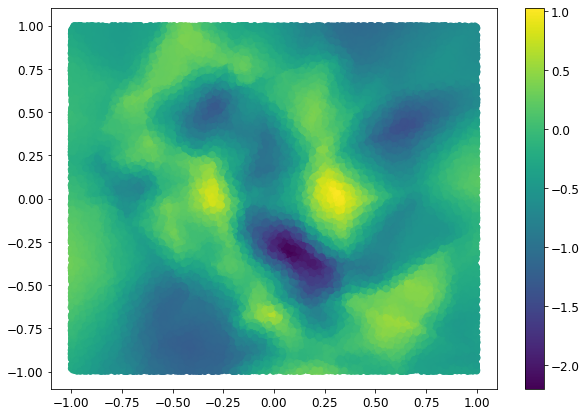

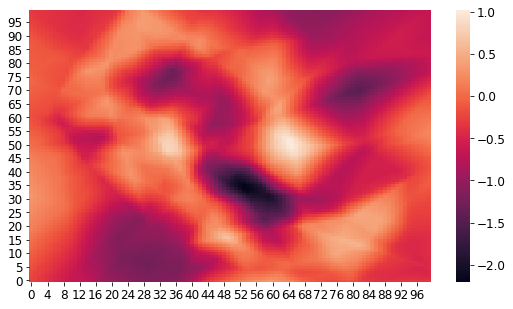

Epoch 1001/8000
Epoch 1002/8000
Epoch 1003/8000
Epoch 1004/8000
Epoch 1005/8000
Epoch 1006/8000
Epoch 1007/8000
Epoch 1008/8000
Epoch 1009/8000
Epoch 1010/8000
Epoch 1011/8000
Epoch 1012/8000
Epoch 1013/8000
Epoch 1014/8000
Epoch 1015/8000
Epoch 1016/8000
Epoch 1017/8000
Epoch 1018/8000
Epoch 1019/8000
Epoch 1020/8000
Epoch 1021/8000
Epoch 1022/8000
Epoch 1023/8000
Epoch 1024/8000
Epoch 1025/8000
Epoch 1026/8000
Epoch 1027/8000
Epoch 1028/8000
Epoch 1029/8000
Epoch 1030/8000
Epoch 1031/8000
Epoch 1032/8000
Epoch 1033/8000
Epoch 1034/8000
Epoch 1035/8000
Epoch 1036/8000
Epoch 1037/8000
Epoch 1038/8000
Epoch 1039/8000
Epoch 1040/8000
Epoch 1041/8000
Epoch 1042/8000
Epoch 1043/8000
Epoch 1044/8000
Epoch 1045/8000
Epoch 1046/8000
Epoch 1047/8000
Epoch 1048/8000
Epoch 1049/8000
Epoch 1050/8000
Epoch 1051/8000
Epoch 1052/8000
Epoch 1053/8000
Epoch 1054/8000
Epoch 1055/8000
Epoch 1056/8000
Epoch 1057/8000
Epoch 1058/8000
Epoch 1059/8000
Epoch 1060/8000
Epoch 1061/8000
Epoch 1062/8000
Epoch 10

Epoch 1518/8000
Epoch 1519/8000
Epoch 1520/8000
Epoch 1521/8000
Epoch 1522/8000
Epoch 1523/8000
Epoch 1524/8000
Epoch 1525/8000
Epoch 1526/8000
Epoch 1527/8000
Epoch 1528/8000
Epoch 1529/8000
Epoch 1530/8000
Epoch 1531/8000
Epoch 1532/8000
Epoch 1533/8000
Epoch 1534/8000
Epoch 1535/8000
Epoch 1536/8000
Epoch 1537/8000
Epoch 1538/8000
Epoch 1539/8000
Epoch 1540/8000
Epoch 1541/8000
Epoch 1542/8000
Epoch 1543/8000
Epoch 1544/8000
Epoch 1545/8000
Epoch 1546/8000
Epoch 1547/8000
Epoch 1548/8000
Epoch 1549/8000
Epoch 1550/8000
Epoch 1551/8000
Epoch 1552/8000
Epoch 1553/8000
Epoch 1554/8000
Epoch 1555/8000
Epoch 1556/8000
Epoch 1557/8000
Epoch 1558/8000
Epoch 1559/8000
Epoch 1560/8000
Epoch 1561/8000
Epoch 1562/8000
Epoch 1563/8000
Epoch 1564/8000
Epoch 1565/8000
Epoch 1566/8000
Epoch 1567/8000
Epoch 1568/8000
Epoch 1569/8000
Epoch 1570/8000
Epoch 1571/8000
Epoch 1572/8000
Epoch 1573/8000
Epoch 1574/8000
Epoch 1575/8000
Epoch 1576/8000
Epoch 1577/8000
Epoch 1578/8000
Epoch 1579/8000
Epoch 15

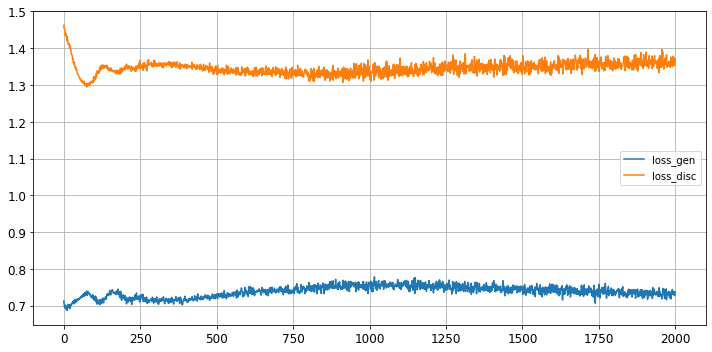

Predicted Values: (1000, 2)
save latent space


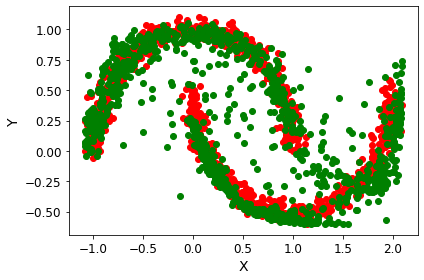

save countour line


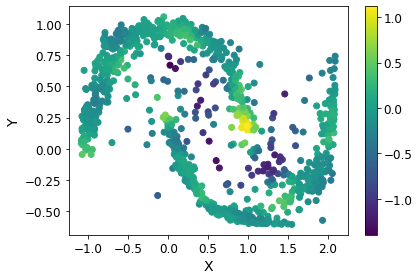

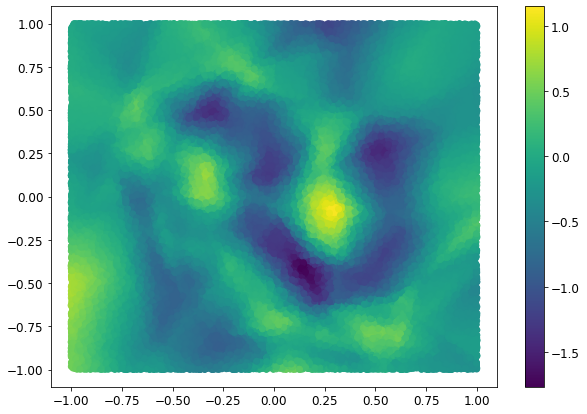

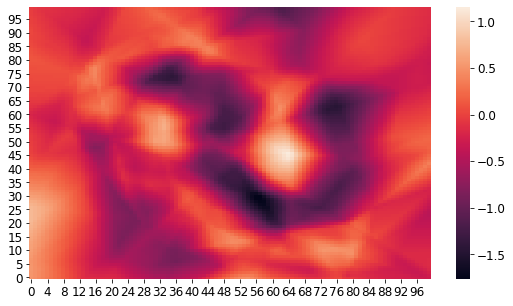

Epoch 2001/8000
Epoch 2002/8000
Epoch 2003/8000
Epoch 2004/8000
Epoch 2005/8000
Epoch 2006/8000
Epoch 2007/8000
Epoch 2008/8000
Epoch 2009/8000
Epoch 2010/8000
Epoch 2011/8000
Epoch 2012/8000
Epoch 2013/8000
Epoch 2014/8000
Epoch 2015/8000
Epoch 2016/8000
Epoch 2017/8000
Epoch 2018/8000
Epoch 2019/8000
Epoch 2020/8000
Epoch 2021/8000
Epoch 2022/8000
Epoch 2023/8000
Epoch 2024/8000
Epoch 2025/8000
Epoch 2026/8000
Epoch 2027/8000
Epoch 2028/8000
Epoch 2029/8000
Epoch 2030/8000
Epoch 2031/8000
Epoch 2032/8000
Epoch 2033/8000
Epoch 2034/8000
Epoch 2035/8000
Epoch 2036/8000
Epoch 2037/8000
Epoch 2038/8000
Epoch 2039/8000
Epoch 2040/8000
Epoch 2041/8000
Epoch 2042/8000
Epoch 2043/8000
Epoch 2044/8000
Epoch 2045/8000
Epoch 2046/8000
Epoch 2047/8000
Epoch 2048/8000
Epoch 2049/8000
Epoch 2050/8000
Epoch 2051/8000
Epoch 2052/8000
Epoch 2053/8000
Epoch 2054/8000
Epoch 2055/8000
Epoch 2056/8000
Epoch 2057/8000
Epoch 2058/8000
Epoch 2059/8000
Epoch 2060/8000
Epoch 2061/8000
Epoch 2062/8000
Epoch 20

Epoch 2516/8000
Epoch 2517/8000
Epoch 2518/8000
Epoch 2519/8000
Epoch 2520/8000
Epoch 2521/8000
Epoch 2522/8000
Epoch 2523/8000
Epoch 2524/8000
Epoch 2525/8000
Epoch 2526/8000
Epoch 2527/8000
Epoch 2528/8000
Epoch 2529/8000
Epoch 2530/8000
Epoch 2531/8000
Epoch 2532/8000
Epoch 2533/8000
Epoch 2534/8000
Epoch 2535/8000
Epoch 2536/8000
Epoch 2537/8000
Epoch 2538/8000
Epoch 2539/8000
Epoch 2540/8000
Epoch 2541/8000
Epoch 2542/8000
Epoch 2543/8000
Epoch 2544/8000
Epoch 2545/8000
Epoch 2546/8000
Epoch 2547/8000
Epoch 2548/8000
Epoch 2549/8000
Epoch 2550/8000
Epoch 2551/8000
Epoch 2552/8000
Epoch 2553/8000
Epoch 2554/8000
Epoch 2555/8000
Epoch 2556/8000
Epoch 2557/8000
Epoch 2558/8000
Epoch 2559/8000
Epoch 2560/8000
Epoch 2561/8000
Epoch 2562/8000
Epoch 2563/8000
Epoch 2564/8000
Epoch 2565/8000
Epoch 2566/8000
Epoch 2567/8000
Epoch 2568/8000
Epoch 2569/8000
Epoch 2570/8000
Epoch 2571/8000
Epoch 2572/8000
Epoch 2573/8000
Epoch 2574/8000
Epoch 2575/8000
Epoch 2576/8000
Epoch 2577/8000
Epoch 25

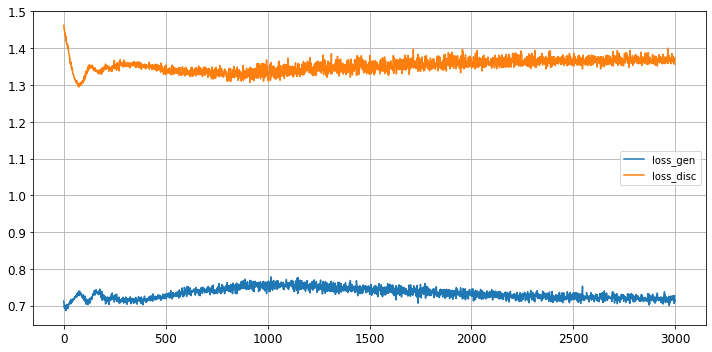

Predicted Values: (1000, 2)
save latent space


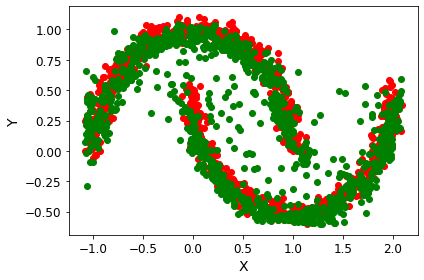

save countour line


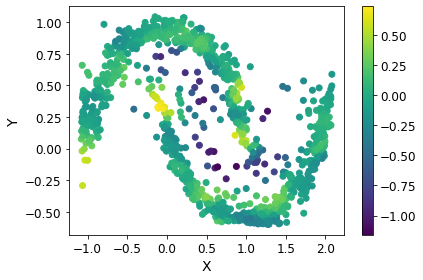

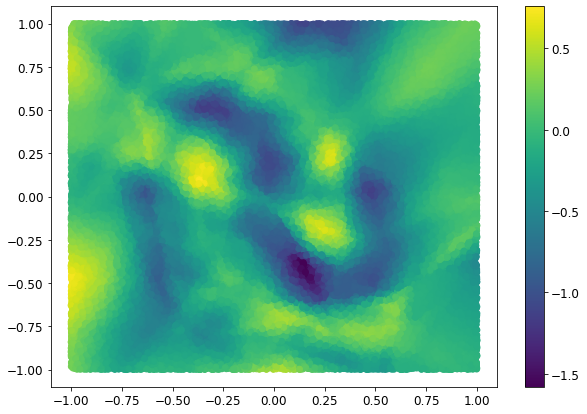

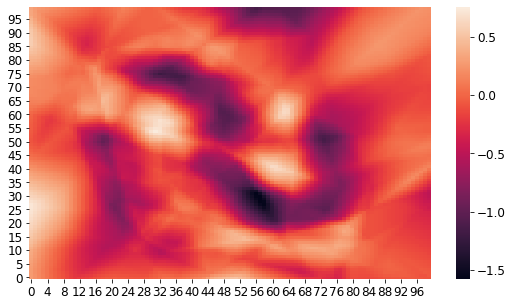

Epoch 3001/8000
Epoch 3002/8000
Epoch 3003/8000
Epoch 3004/8000
Epoch 3005/8000
Epoch 3006/8000
Epoch 3007/8000
Epoch 3008/8000
Epoch 3009/8000
Epoch 3010/8000
Epoch 3011/8000
Epoch 3012/8000
Epoch 3013/8000
Epoch 3014/8000
Epoch 3015/8000
Epoch 3016/8000
Epoch 3017/8000
Epoch 3018/8000
Epoch 3019/8000
Epoch 3020/8000
Epoch 3021/8000
Epoch 3022/8000
Epoch 3023/8000
Epoch 3024/8000
Epoch 3025/8000
Epoch 3026/8000
Epoch 3027/8000
Epoch 3028/8000
Epoch 3029/8000
Epoch 3030/8000
Epoch 3031/8000
Epoch 3032/8000
Epoch 3033/8000
Epoch 3034/8000
Epoch 3035/8000
Epoch 3036/8000
Epoch 3037/8000
Epoch 3038/8000
Epoch 3039/8000
Epoch 3040/8000
Epoch 3041/8000
Epoch 3042/8000
Epoch 3043/8000
Epoch 3044/8000
Epoch 3045/8000
Epoch 3046/8000
Epoch 3047/8000
Epoch 3048/8000
Epoch 3049/8000
Epoch 3050/8000
Epoch 3051/8000
Epoch 3052/8000
Epoch 3053/8000
Epoch 3054/8000
Epoch 3055/8000
Epoch 3056/8000
Epoch 3057/8000
Epoch 3058/8000
Epoch 3059/8000
Epoch 3060/8000
Epoch 3061/8000
Epoch 3062/8000
Epoch 30

Epoch 3518/8000
Epoch 3519/8000
Epoch 3520/8000
Epoch 3521/8000
Epoch 3522/8000
Epoch 3523/8000
Epoch 3524/8000
Epoch 3525/8000
Epoch 3526/8000
Epoch 3527/8000
Epoch 3528/8000
Epoch 3529/8000
Epoch 3530/8000
Epoch 3531/8000
Epoch 3532/8000
Epoch 3533/8000
Epoch 3534/8000
Epoch 3535/8000
Epoch 3536/8000
Epoch 3537/8000
Epoch 3538/8000
Epoch 3539/8000
Epoch 3540/8000
Epoch 3541/8000
Epoch 3542/8000
Epoch 3543/8000
Epoch 3544/8000
Epoch 3545/8000
Epoch 3546/8000
Epoch 3547/8000
Epoch 3548/8000
Epoch 3549/8000
Epoch 3550/8000
Epoch 3551/8000
Epoch 3552/8000
Epoch 3553/8000
Epoch 3554/8000
Epoch 3555/8000
Epoch 3556/8000
Epoch 3557/8000
Epoch 3558/8000
Epoch 3559/8000
Epoch 3560/8000
Epoch 3561/8000
Epoch 3562/8000
Epoch 3563/8000
Epoch 3564/8000
Epoch 3565/8000
Epoch 3566/8000
Epoch 3567/8000
Epoch 3568/8000
Epoch 3569/8000
Epoch 3570/8000
Epoch 3571/8000
Epoch 3572/8000
Epoch 3573/8000
Epoch 3574/8000
Epoch 3575/8000
Epoch 3576/8000
Epoch 3577/8000
Epoch 3578/8000
Epoch 3579/8000
Epoch 35

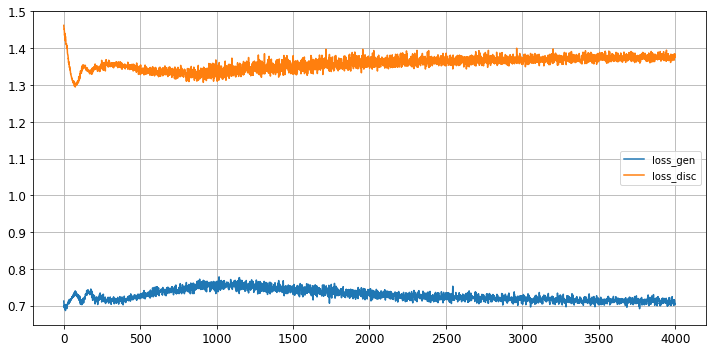

Predicted Values: (1000, 2)
save latent space


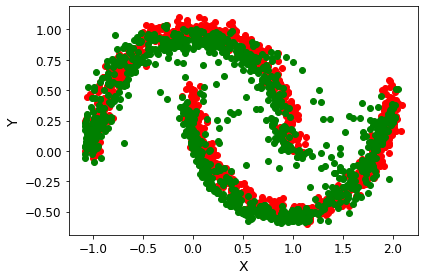

save countour line


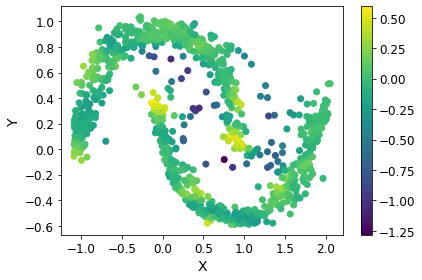

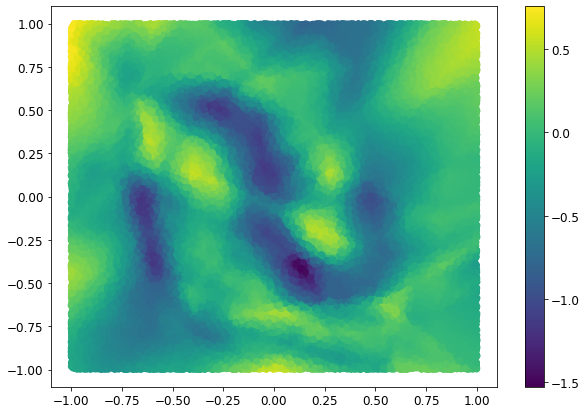

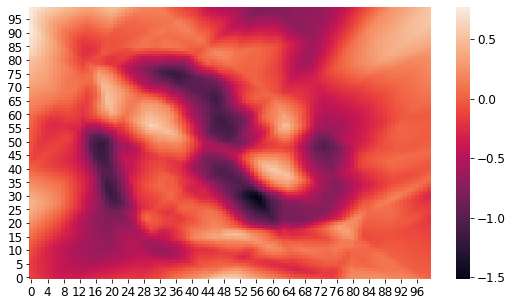

Epoch 4001/8000
Epoch 4002/8000
Epoch 4003/8000
Epoch 4004/8000
Epoch 4005/8000
Epoch 4006/8000
Epoch 4007/8000
Epoch 4008/8000
Epoch 4009/8000
Epoch 4010/8000
Epoch 4011/8000
Epoch 4012/8000
Epoch 4013/8000
Epoch 4014/8000
Epoch 4015/8000
Epoch 4016/8000
Epoch 4017/8000
Epoch 4018/8000
Epoch 4019/8000
Epoch 4020/8000
Epoch 4021/8000
Epoch 4022/8000
Epoch 4023/8000
Epoch 4024/8000
Epoch 4025/8000
Epoch 4026/8000
Epoch 4027/8000
Epoch 4028/8000
Epoch 4029/8000
Epoch 4030/8000
Epoch 4031/8000
Epoch 4032/8000
Epoch 4033/8000
Epoch 4034/8000
Epoch 4035/8000
Epoch 4036/8000
Epoch 4037/8000
Epoch 4038/8000
Epoch 4039/8000
Epoch 4040/8000
Epoch 4041/8000
Epoch 4042/8000
Epoch 4043/8000
Epoch 4044/8000
Epoch 4045/8000
Epoch 4046/8000
Epoch 4047/8000
Epoch 4048/8000
Epoch 4049/8000
Epoch 4050/8000
Epoch 4051/8000
Epoch 4052/8000
Epoch 4053/8000
Epoch 4054/8000
Epoch 4055/8000
Epoch 4056/8000
Epoch 4057/8000
Epoch 4058/8000
Epoch 4059/8000
Epoch 4060/8000
Epoch 4061/8000
Epoch 4062/8000
Epoch 40

Epoch 4515/8000
Epoch 4516/8000
Epoch 4517/8000
Epoch 4518/8000
Epoch 4519/8000
Epoch 4520/8000
Epoch 4521/8000
Epoch 4522/8000
Epoch 4523/8000
Epoch 4524/8000
Epoch 4525/8000
Epoch 4526/8000
Epoch 4527/8000
Epoch 4528/8000
Epoch 4529/8000
Epoch 4530/8000
Epoch 4531/8000
Epoch 4532/8000
Epoch 4533/8000
Epoch 4534/8000
Epoch 4535/8000
Epoch 4536/8000
Epoch 4537/8000
Epoch 4538/8000
Epoch 4539/8000
Epoch 4540/8000
Epoch 4541/8000
Epoch 4542/8000
Epoch 4543/8000
Epoch 4544/8000
Epoch 4545/8000
Epoch 4546/8000
Epoch 4547/8000
Epoch 4548/8000
Epoch 4549/8000
Epoch 4550/8000
Epoch 4551/8000
Epoch 4552/8000
Epoch 4553/8000
Epoch 4554/8000
Epoch 4555/8000
Epoch 4556/8000
Epoch 4557/8000
Epoch 4558/8000
Epoch 4559/8000
Epoch 4560/8000
Epoch 4561/8000
Epoch 4562/8000
Epoch 4563/8000
Epoch 4564/8000
Epoch 4565/8000
Epoch 4566/8000
Epoch 4567/8000
Epoch 4568/8000
Epoch 4569/8000
Epoch 4570/8000
Epoch 4571/8000
Epoch 4572/8000
Epoch 4573/8000
Epoch 4574/8000
Epoch 4575/8000
Epoch 4576/8000
Epoch 45

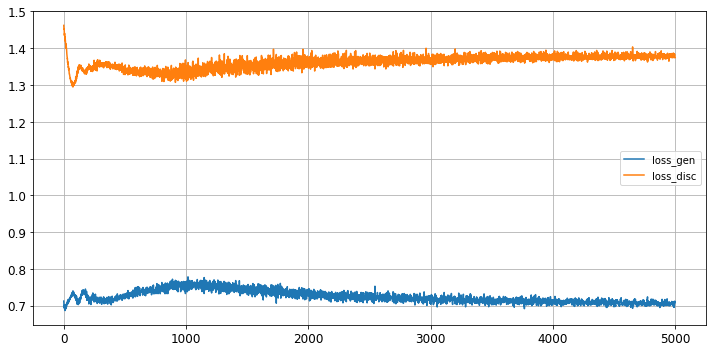

Predicted Values: (1000, 2)
save latent space


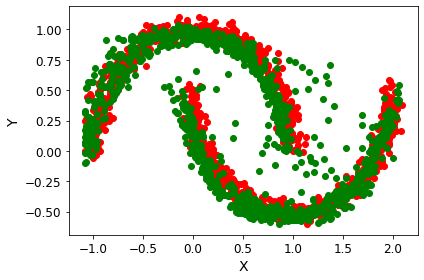

save countour line


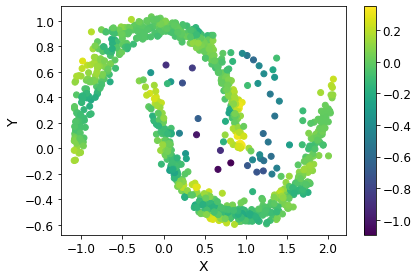

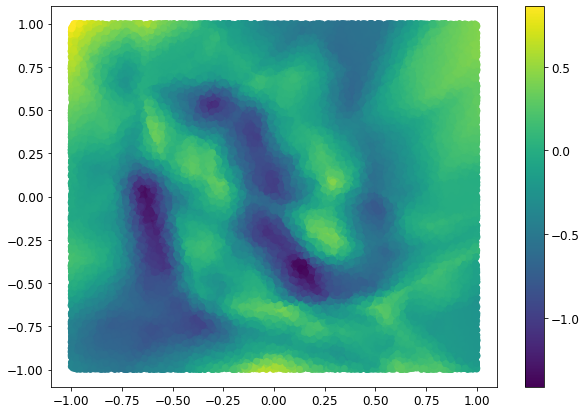

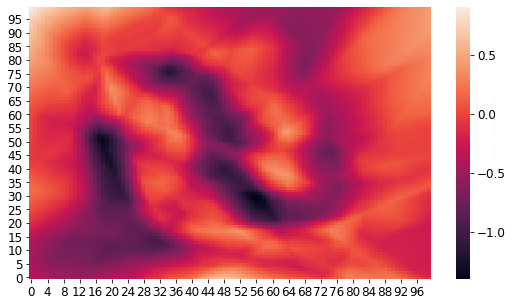

Epoch 5001/8000
Epoch 5002/8000
Epoch 5003/8000
Epoch 5004/8000
Epoch 5005/8000
Epoch 5006/8000
Epoch 5007/8000
Epoch 5008/8000
Epoch 5009/8000
Epoch 5010/8000
Epoch 5011/8000
Epoch 5012/8000
Epoch 5013/8000
Epoch 5014/8000
Epoch 5015/8000
Epoch 5016/8000
Epoch 5017/8000
Epoch 5018/8000
Epoch 5019/8000
Epoch 5020/8000
Epoch 5021/8000
Epoch 5022/8000
Epoch 5023/8000
Epoch 5024/8000
Epoch 5025/8000
Epoch 5026/8000
Epoch 5027/8000
Epoch 5028/8000
Epoch 5029/8000
Epoch 5030/8000
Epoch 5031/8000
Epoch 5032/8000
Epoch 5033/8000
Epoch 5034/8000
Epoch 5035/8000
Epoch 5036/8000
Epoch 5037/8000
Epoch 5038/8000
Epoch 5039/8000
Epoch 5040/8000
Epoch 5041/8000
Epoch 5042/8000
Epoch 5043/8000
Epoch 5044/8000
Epoch 5045/8000
Epoch 5046/8000
Epoch 5047/8000
Epoch 5048/8000
Epoch 5049/8000
Epoch 5050/8000
Epoch 5051/8000
Epoch 5052/8000
Epoch 5053/8000
Epoch 5054/8000
Epoch 5055/8000
Epoch 5056/8000
Epoch 5057/8000
Epoch 5058/8000
Epoch 5059/8000
Epoch 5060/8000
Epoch 5061/8000
Epoch 5062/8000
Epoch 50

Epoch 5514/8000
Epoch 5515/8000
Epoch 5516/8000
Epoch 5517/8000
Epoch 5518/8000
Epoch 5519/8000
Epoch 5520/8000
Epoch 5521/8000
Epoch 5522/8000
Epoch 5523/8000
Epoch 5524/8000
Epoch 5525/8000
Epoch 5526/8000
Epoch 5527/8000
Epoch 5528/8000
Epoch 5529/8000
Epoch 5530/8000
Epoch 5531/8000
Epoch 5532/8000
Epoch 5533/8000
Epoch 5534/8000
Epoch 5535/8000
Epoch 5536/8000
Epoch 5537/8000
Epoch 5538/8000
Epoch 5539/8000
Epoch 5540/8000
Epoch 5541/8000
Epoch 5542/8000
Epoch 5543/8000
Epoch 5544/8000
Epoch 5545/8000
Epoch 5546/8000
Epoch 5547/8000
Epoch 5548/8000
Epoch 5549/8000
Epoch 5550/8000
Epoch 5551/8000
Epoch 5552/8000
Epoch 5553/8000
Epoch 5554/8000
Epoch 5555/8000
Epoch 5556/8000
Epoch 5557/8000
Epoch 5558/8000
Epoch 5559/8000
Epoch 5560/8000
Epoch 5561/8000
Epoch 5562/8000
Epoch 5563/8000
Epoch 5564/8000
Epoch 5565/8000
Epoch 5566/8000
Epoch 5567/8000
Epoch 5568/8000
Epoch 5569/8000
Epoch 5570/8000
Epoch 5571/8000
Epoch 5572/8000
Epoch 5573/8000
Epoch 5574/8000
Epoch 5575/8000
Epoch 55

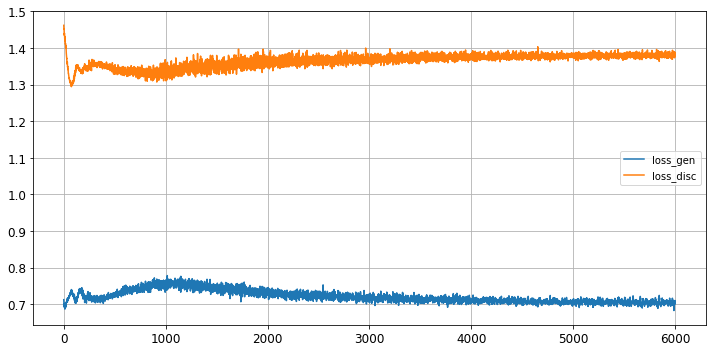

Predicted Values: (1000, 2)
save latent space


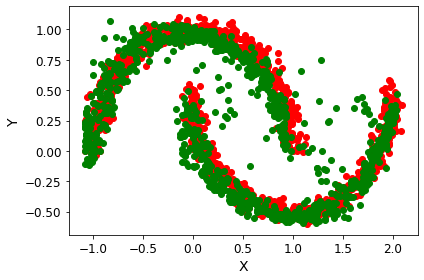

save countour line


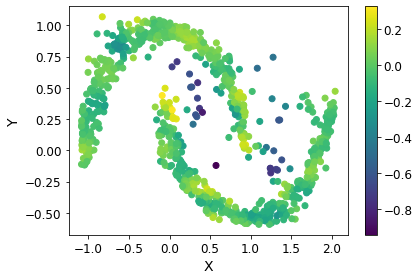

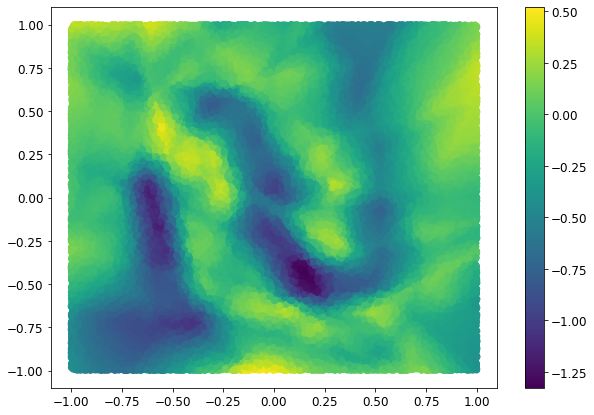

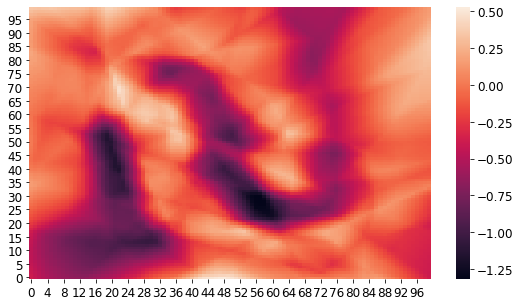

Epoch 6001/8000
Epoch 6002/8000
Epoch 6003/8000
Epoch 6004/8000
Epoch 6005/8000
Epoch 6006/8000
Epoch 6007/8000
Epoch 6008/8000
Epoch 6009/8000
Epoch 6010/8000
Epoch 6011/8000
Epoch 6012/8000
Epoch 6013/8000
Epoch 6014/8000
Epoch 6015/8000
Epoch 6016/8000
Epoch 6017/8000
Epoch 6018/8000
Epoch 6019/8000
Epoch 6020/8000
Epoch 6021/8000
Epoch 6022/8000
Epoch 6023/8000
Epoch 6024/8000
Epoch 6025/8000
Epoch 6026/8000
Epoch 6027/8000
Epoch 6028/8000
Epoch 6029/8000
Epoch 6030/8000
Epoch 6031/8000
Epoch 6032/8000
Epoch 6033/8000
Epoch 6034/8000
Epoch 6035/8000
Epoch 6036/8000
Epoch 6037/8000
Epoch 6038/8000
Epoch 6039/8000
Epoch 6040/8000
Epoch 6041/8000
Epoch 6042/8000
Epoch 6043/8000
Epoch 6044/8000
Epoch 6045/8000
Epoch 6046/8000
Epoch 6047/8000
Epoch 6048/8000
Epoch 6049/8000
Epoch 6050/8000
Epoch 6051/8000
Epoch 6052/8000
Epoch 6053/8000
Epoch 6054/8000
Epoch 6055/8000
Epoch 6056/8000
Epoch 6057/8000
Epoch 6058/8000
Epoch 6059/8000
Epoch 6060/8000
Epoch 6061/8000
Epoch 6062/8000
Epoch 60

Epoch 6514/8000
Epoch 6515/8000
Epoch 6516/8000
Epoch 6517/8000
Epoch 6518/8000
Epoch 6519/8000
Epoch 6520/8000
Epoch 6521/8000
Epoch 6522/8000
Epoch 6523/8000
Epoch 6524/8000
Epoch 6525/8000
Epoch 6526/8000
Epoch 6527/8000
Epoch 6528/8000
Epoch 6529/8000
Epoch 6530/8000
Epoch 6531/8000
Epoch 6532/8000
Epoch 6533/8000
Epoch 6534/8000
Epoch 6535/8000
Epoch 6536/8000
Epoch 6537/8000
Epoch 6538/8000
Epoch 6539/8000
Epoch 6540/8000
Epoch 6541/8000
Epoch 6542/8000
Epoch 6543/8000
Epoch 6544/8000
Epoch 6545/8000
Epoch 6546/8000
Epoch 6547/8000
Epoch 6548/8000
Epoch 6549/8000
Epoch 6550/8000
Epoch 6551/8000
Epoch 6552/8000
Epoch 6553/8000
Epoch 6554/8000
Epoch 6555/8000
Epoch 6556/8000
Epoch 6557/8000
Epoch 6558/8000
Epoch 6559/8000
Epoch 6560/8000
Epoch 6561/8000
Epoch 6562/8000
Epoch 6563/8000
Epoch 6564/8000
Epoch 6565/8000
Epoch 6566/8000
Epoch 6567/8000
Epoch 6568/8000
Epoch 6569/8000
Epoch 6570/8000
Epoch 6571/8000
Epoch 6572/8000
Epoch 6573/8000
Epoch 6574/8000
Epoch 6575/8000
Epoch 65

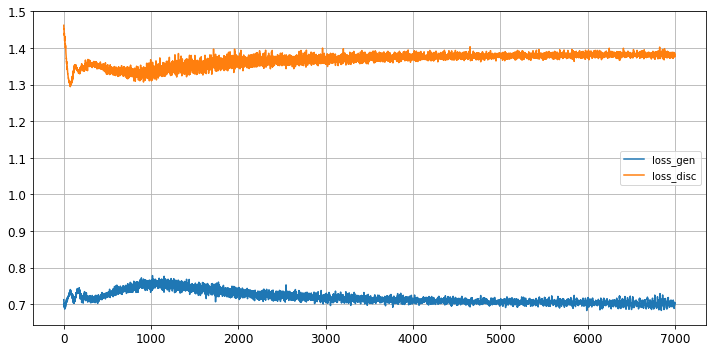

Predicted Values: (1000, 2)
save latent space


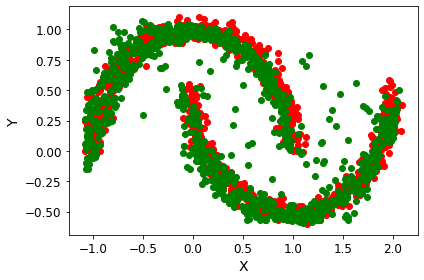

save countour line


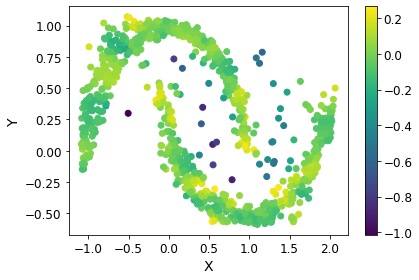

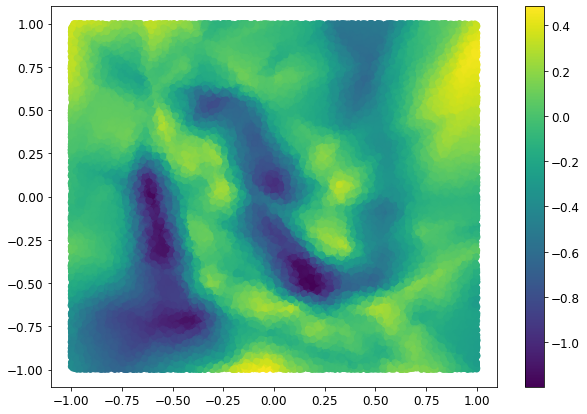

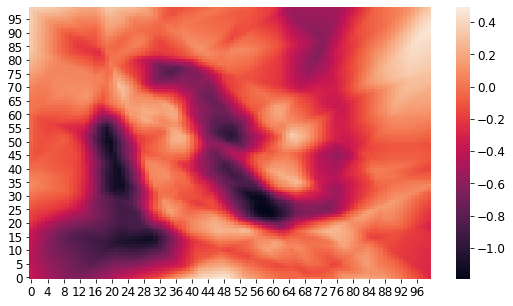

Epoch 7001/8000
Epoch 7002/8000
Epoch 7003/8000
Epoch 7004/8000
Epoch 7005/8000
Epoch 7006/8000
Epoch 7007/8000
Epoch 7008/8000
Epoch 7009/8000
Epoch 7010/8000
Epoch 7011/8000
Epoch 7012/8000
Epoch 7013/8000
Epoch 7014/8000
Epoch 7015/8000
Epoch 7016/8000
Epoch 7017/8000
Epoch 7018/8000
Epoch 7019/8000
Epoch 7020/8000
Epoch 7021/8000
Epoch 7022/8000
Epoch 7023/8000
Epoch 7024/8000
Epoch 7025/8000
Epoch 7026/8000
Epoch 7027/8000
Epoch 7028/8000
Epoch 7029/8000
Epoch 7030/8000
Epoch 7031/8000
Epoch 7032/8000
Epoch 7033/8000
Epoch 7034/8000
Epoch 7035/8000
Epoch 7036/8000
Epoch 7037/8000
Epoch 7038/8000
Epoch 7039/8000
Epoch 7040/8000
Epoch 7041/8000
Epoch 7042/8000
Epoch 7043/8000
Epoch 7044/8000
Epoch 7045/8000
Epoch 7046/8000
Epoch 7047/8000
Epoch 7048/8000
Epoch 7049/8000
Epoch 7050/8000
Epoch 7051/8000
Epoch 7052/8000
Epoch 7053/8000
Epoch 7054/8000
Epoch 7055/8000
Epoch 7056/8000
Epoch 7057/8000
Epoch 7058/8000
Epoch 7059/8000
Epoch 7060/8000
Epoch 7061/8000
Epoch 7062/8000
Epoch 70

Epoch 7516/8000
Epoch 7517/8000
Epoch 7518/8000
Epoch 7519/8000
Epoch 7520/8000
Epoch 7521/8000
Epoch 7522/8000
Epoch 7523/8000
Epoch 7524/8000
Epoch 7525/8000
Epoch 7526/8000
Epoch 7527/8000
Epoch 7528/8000
Epoch 7529/8000
Epoch 7530/8000
Epoch 7531/8000
Epoch 7532/8000
Epoch 7533/8000
Epoch 7534/8000
Epoch 7535/8000
Epoch 7536/8000
Epoch 7537/8000
Epoch 7538/8000
Epoch 7539/8000
Epoch 7540/8000
Epoch 7541/8000
Epoch 7542/8000
Epoch 7543/8000
Epoch 7544/8000
Epoch 7545/8000
Epoch 7546/8000
Epoch 7547/8000
Epoch 7548/8000
Epoch 7549/8000
Epoch 7550/8000
Epoch 7551/8000
Epoch 7552/8000
Epoch 7553/8000
Epoch 7554/8000
Epoch 7555/8000
Epoch 7556/8000
Epoch 7557/8000
Epoch 7558/8000
Epoch 7559/8000
Epoch 7560/8000
Epoch 7561/8000
Epoch 7562/8000
Epoch 7563/8000
Epoch 7564/8000
Epoch 7565/8000
Epoch 7566/8000
Epoch 7567/8000
Epoch 7568/8000
Epoch 7569/8000
Epoch 7570/8000
Epoch 7571/8000
Epoch 7572/8000
Epoch 7573/8000
Epoch 7574/8000
Epoch 7575/8000
Epoch 7576/8000
Epoch 7577/8000
Epoch 75

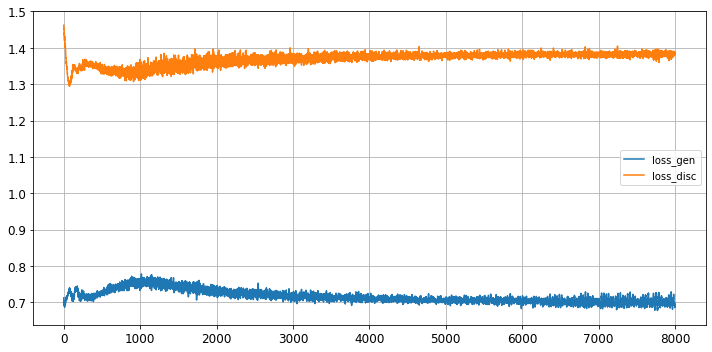

Predicted Values: (1000, 2)
save latent space


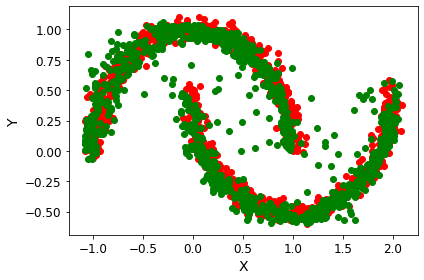

save countour line


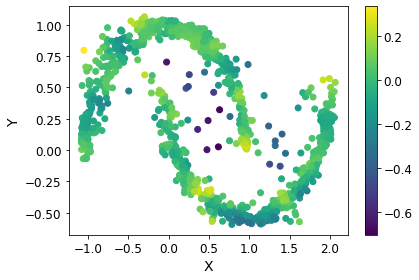

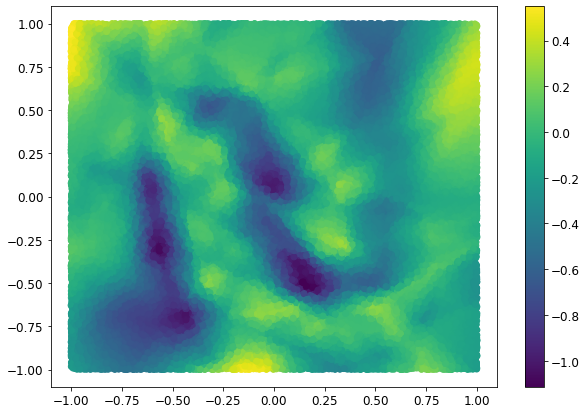

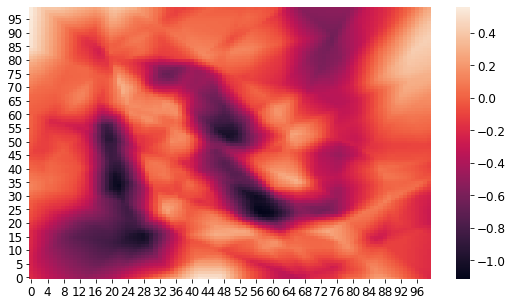

In [8]:
hist = dcgan.train(train_dataset, epochs, scaler, scaled, X_train, y_train)

#### plot loss

In [16]:
k = 1
epoch = 8000

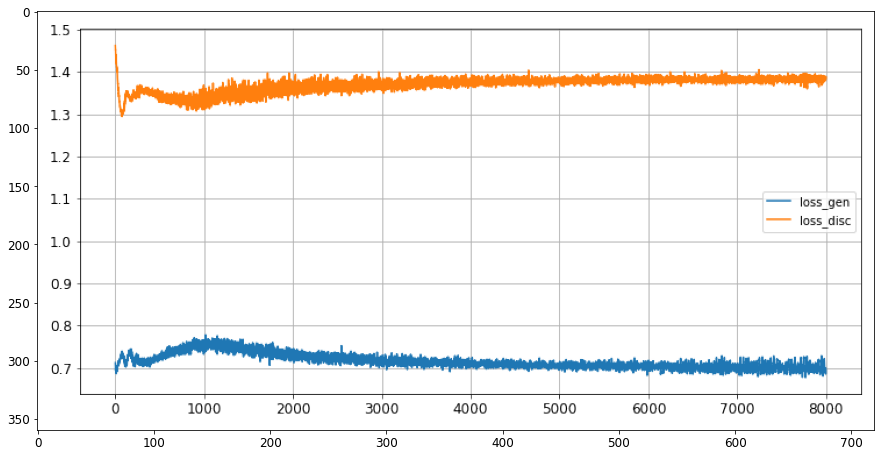

In [17]:
from PIL import Image

#Discriminator Loss
loss = Image.open('GANS/Losses/GANS_loss_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Loss",figsize=[15,10])
plt.imshow(loss)

### Sampleing from the latent space

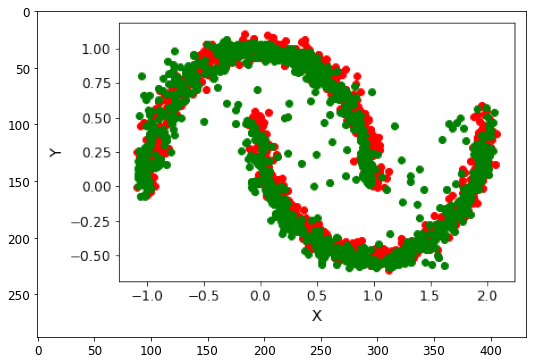

In [18]:
#Discriminator Loss
result = Image.open('GANS/Result/Latent/v_'+str(k)+'_epochs_'+str(epoch)+'.png')
plt.figure("Latent Space",figsize=[10,6])
plt.imshow(result)
    

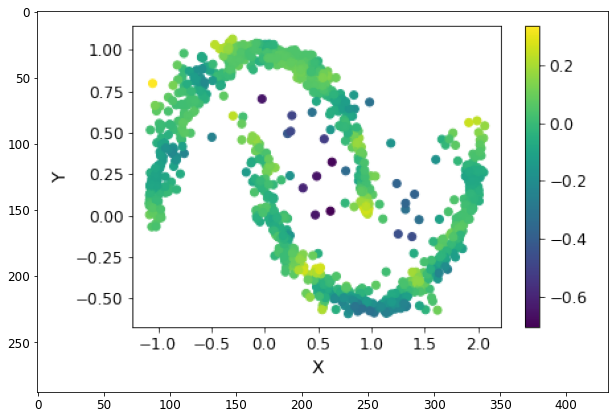

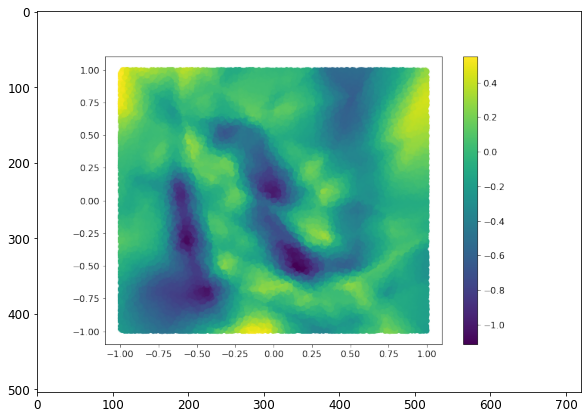

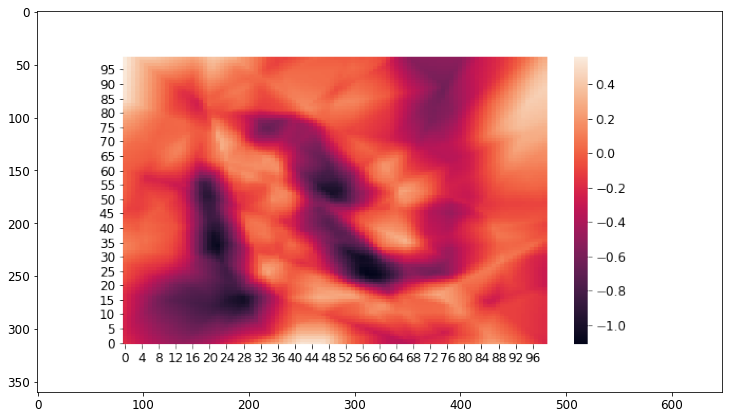

In [19]:
countour_line = Image.open('GANS/Result/'+'countour_points_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Countour Line",figsize=[18,7])
plt.imshow(countour_line)

countour_mesh = Image.open('GANS/Result/'+'countour_mesh_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Countour Mesh",figsize=[18,7])
plt.imshow(countour_mesh)

countour_heat = Image.open('GANS/Result/'+'heatmap_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Countour heat",figsize=[18,7])
plt.imshow(countour_heat)

### Applying the prediction function

## Fixed Input

input_test : (700, 2)


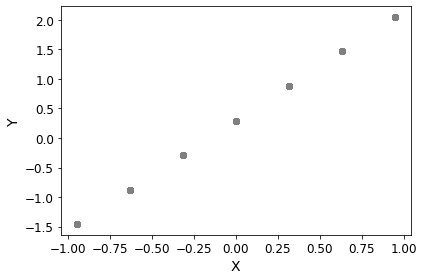

In [13]:
# define these for desired prediction
x_input = [-1.0,-0.5,0,0.5,1.0,1.5,2.0]
n_points = 700
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//7, n_features), x_input[0])
predict2 = np.full((n_points//7, n_features), x_input[1])
predict3 = np.full((n_points//7, n_features), x_input[2])
predict4 = np.full((n_points//7, n_features), x_input[3])
predict5 = np.full((n_points//7, n_features), x_input[4])
predict6 = np.full((n_points//7, n_features), x_input[5])
predict7 = np.full((n_points//7, n_features), x_input[6])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7))
predictthis = scaler.transform(predictthis)
input_test = predictthis.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [14]:
X_generated = dcgan.predict(input_test, scaler)

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

Generated Data: (699, 2)


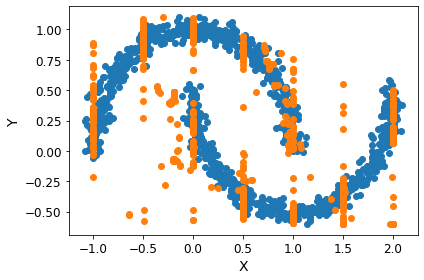

In [20]:
if scenario in ("3d", "helix"):
    print("latent_space=",latent_space)
    print("Epochs=",epochs)
    print("BATCH_SIZE=",BATCH_SIZE)
    print("use_bias=",use_bias)
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')
    #ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r', label='Sample Data')

    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,label="Sample Data")
    plt.scatter(X_generated[:,0],X_generated[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.savefig('GANS/Result/'+'prediction_v'+str(k)+'_epochs'+str(epoch+1)+'.png')
    plt.tight_layout()